# LASSO for Granger Causality

In [99]:
import numpy as np
import pandas as pd
import networkx as nx
from itertools import permutations
import graphviz
from collections import defaultdict

import matplotlib.pyplot as plt
%matplotlib inline 

In [100]:
plt.rcParams["figure.figsize"] = [30,10]


In [101]:
data = pd.read_csv('output.csv')

In [102]:
#data = data[['x1', 'x2', 'x3', 'x4', 'x5']]
data.head()

,x0,x1,x2,x3,x4
0,0.004284,0.010909,0.565527,0.748062,-1.080734
1,1.389892,0.231238,-0.940587,-0.622085,2.706184
2,-0.621697,-0.285419,1.225865,-0.084072,0.704742
3,0.319996,1.818682,-0.203634,0.690878,-0.519456
4,0.334225,-0.399658,-1.663087,0.513636,0.313706


In [103]:
from sklearn import linear_model

In [104]:
ts = data.to_numpy()

In [105]:
transformed = []

max_lag = 5
for i in range(ts.shape[0]):
    if i >= max_lag:
        start = i - max_lag 
        target = ts[:,0][i]
        regressors = []
        for ii in range(ts.shape[1]):
            regressors.append(list(ts[:,ii][start:i]))
        transformed.append([target] + list(np.array(regressors).flatten()))
                

transformed = np.array(transformed)

y = transformed[:,0]
x = transformed[:,1:]

In [106]:
i

1009

In [107]:
# shrink parameters to zero
lambdas = np.linspace(0,.9,10) 
coefs = []

for l in lambdas:
    clf = linear_model.Lasso(alpha=l)
    clf.fit(x, y)
    coefs.append(list(clf.coef_))

/Users/barch001/anaconda3/envs/pynew/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/Users/barch001/anaconda3/envs/pynew/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/barch001/anaconda3/envs/pynew/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 489.6354759807608, tolerance: 0.10040723994483051
  positive)


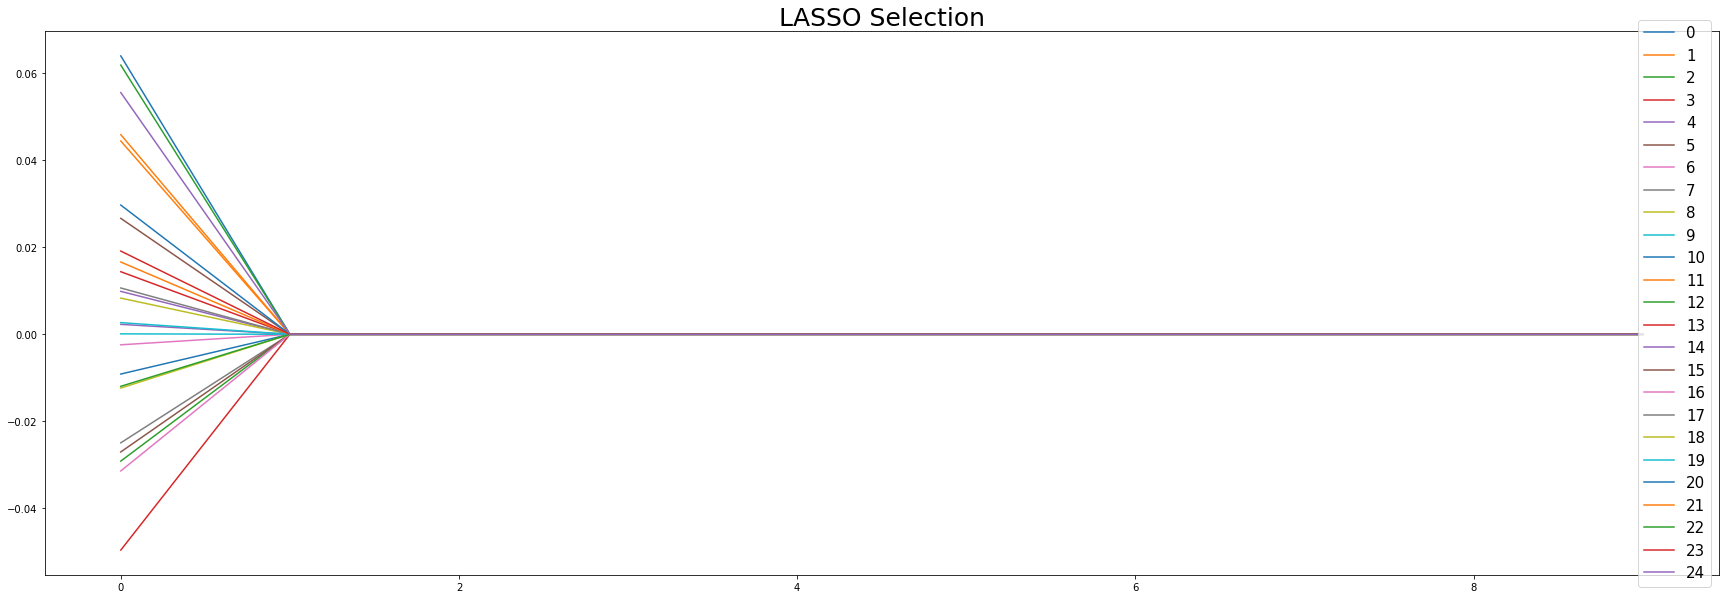

In [108]:
for i in range(np.array(coefs).shape[1]):
    c = np.array(coefs)[:,i]
    plt.plot(c, label='%s' % i)
    
plt.title("LASSO Selection", fontsize=25)
plt.legend(fontsize=15, loc='center right')

In [109]:
coef_df = pd.DataFrame(np.array(coefs))

header = []

for i in data.columns.values:
    for lag in range(1,6):
        header.append('%s_t%s' % (i, lag))

coef_df.columns = header

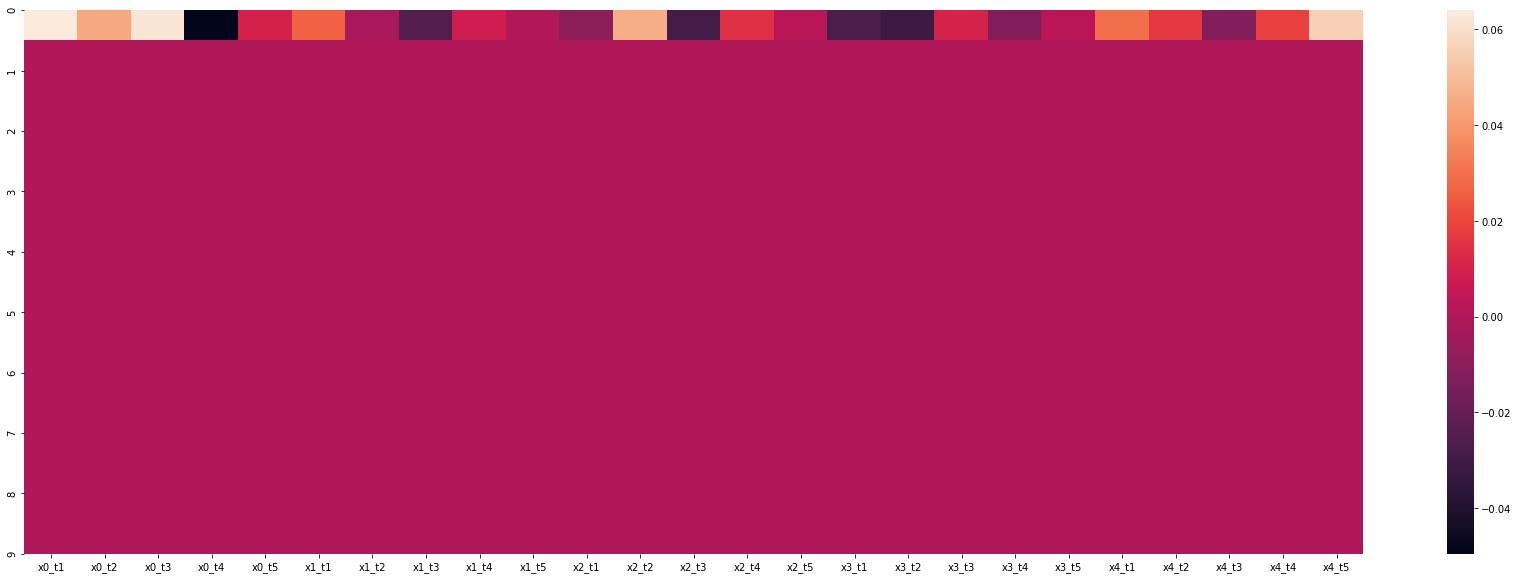

In [110]:
import seaborn as sns

sns.heatmap(coef_df)

In [111]:
coef_df.loc[1]

x0_t1    0.0
x0_t2    0.0
x0_t3    0.0
x0_t4   -0.0
x0_t5    0.0
x1_t1    0.0
x1_t2    0.0
x1_t3   -0.0
x1_t4    0.0
x1_t5    0.0
x2_t1   -0.0
x2_t2    0.0
x2_t3   -0.0
x2_t4   -0.0
x2_t5   -0.0
x3_t1   -0.0
x3_t2   -0.0
x3_t3    0.0
x3_t4   -0.0
x3_t5    0.0
x4_t1    0.0
x4_t2    0.0
x4_t3   -0.0
x4_t4    0.0
x4_t5    0.0
Name: 1, dtype: float64